In [14]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

In [15]:
_batch_size = 64
_time_step = 28    # run time step / image height
_input_size = 28   # run input size / image width
_lr = 0.01         # learning rate

In [16]:
# data
_mnist = input_data.read_data_sets('./mnist', one_hot=True)              # they has been normalized to range (0,1)
_test_x = _mnist.test.images[:2000]
_test_y = _mnist.test.labels[:2000]

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz


(55000, 784)
(55000, 10)


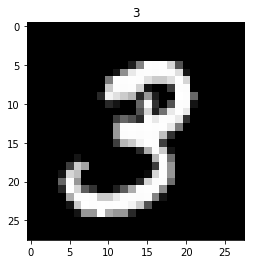

In [17]:
# plot one example
print(_mnist.train.images.shape)     # (55000, 28 * 28)
print(_mnist.train.labels.shape)   # (55000, 10)
plt.imshow(_mnist.train.images[1].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(_mnist.train.labels[1]))
plt.show()

In [18]:
# tensorflow placeholders
_tf_x = tf.placeholder(tf.float32, [None, _time_step * _input_size])        # shape(batch, 784)
_image = tf.reshape(_tf_x, [-1, _time_step, _input_size])                   # (batch, height, width, channel)
_tf_y = tf.placeholder(tf.int32, [None, 10])                                # input y

In [20]:
# RNN
_rnn_cell = tf.contrib.rnn.BasicLSTMCell(num_units=64)
with tf.variable_scope('rnn'):
    _outputs, (h_c, h_n) = tf.nn.dynamic_rnn(
        _rnn_cell,                   # cell you have chosen
        _image,                      # input
        initial_state=None,          # the initial hidden state
        dtype=tf.float32,            # must given if set initial_state = None
        time_major=False,            # False: (batch, time step, input); True: (time step, batch, input)
    )
    _output = tf.layers.dense(_outputs[:, -1, :], 10)              # output based on the last output step

In [21]:
_loss = tf.losses.softmax_cross_entropy(onehot_labels=_tf_y, logits=_output)           # compute cost
_train = tf.train.AdamOptimizer(_lr).minimize(_loss)

In [22]:
_accuracy = tf.metrics.accuracy(          # return (acc, update_op), and create 2 local variables
    labels=tf.argmax(_tf_y, axis=1), predictions=tf.argmax(_output, axis=1),)[1]

In [23]:
sess = tf.Session()
_init = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer()) # the local var is for accuracy_op
sess.run(_init)     # initialize var in graph

In [24]:
for step in range(1200):    # training
    _b_x, _b_y = _mnist.train.next_batch(_batch_size)
    _, loss_ = sess.run([_train, _loss], {_tf_x: _b_x, _tf_y: _b_y})
    if step % 100 == 0:      # testing
        accuracy_ = sess.run(_accuracy, {_tf_x: _test_x, _tf_y: _test_y})
        print('train loss: %.4f' % loss_, '| test accuracy: %.2f' % accuracy_)

train loss: 2.3041 | test accuracy: 0.09
train loss: 0.6615 | test accuracy: 0.44
train loss: 0.4442 | test accuracy: 0.60
train loss: 0.3982 | test accuracy: 0.68
train loss: 0.1818 | test accuracy: 0.73
train loss: 0.2045 | test accuracy: 0.77
train loss: 0.2437 | test accuracy: 0.79
train loss: 0.0768 | test accuracy: 0.81
train loss: 0.1170 | test accuracy: 0.83
train loss: 0.1083 | test accuracy: 0.84
train loss: 0.1035 | test accuracy: 0.85
train loss: 0.0454 | test accuracy: 0.86


In [26]:
# print 10 predictions from test data
_test_output = sess.run(_output, {_tf_x: _test_x[:10]})
_pred_y = np.argmax(_test_output, 1)
print(_pred_y, 'prediction number')
print(np.argmax(_test_y[:10], 1), 'real number')

[7 2 1 0 4 1 4 9 6 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


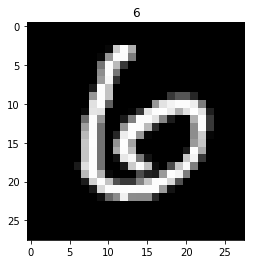

[6] prediction number
[6] real number


In [27]:
plt.imshow(_test_x[11].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(_test_y[11])); 
plt.show()

_test_output = sess.run(_output, {_tf_x: _test_x[11:12]})
_pred_y = np.argmax(_test_output, 1)
print(_pred_y, 'prediction number')
print(np.argmax(_test_y[11:12], 1), 'real number')